## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.3242 - acc: 0.5262 - val_loss: 1.4381 - val_acc: 0.4923
Epoch 2/100
50000/50000 [==============================] - 7s 150us/step - loss: 1.2884 - acc: 0.5395 - val_loss: 1.4036 - val_acc: 0.4990
Epoch 3/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.2769 - acc: 0.5433 - val_loss: 1.4050 - val_acc: 0.5033
Epoch 4/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.2458 - acc: 0.5562 - val_loss: 1.3868 - val_acc: 0.5110
Epoch 5/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.2209 - acc: 0.5654 - val_loss: 1.3813 - val_acc: 0.5093
Epoch 6/100
50000/50000 [==============================] - 7s 149us/step - loss: 1.2087 - acc: 0.5686 - val_loss: 1.3764 - val_acc: 0.5150
Epoch 7/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.1844 - acc: 0.5792 - val_loss: 1.

50000/50000 [==============================] - 7s 142us/step - loss: 0.4225 - acc: 0.8479 - val_loss: 2.4012 - val_acc: 0.5081
Epoch 60/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.4184 - acc: 0.8500 - val_loss: 2.4890 - val_acc: 0.5011
Epoch 61/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.4173 - acc: 0.8501 - val_loss: 2.5081 - val_acc: 0.4943
Epoch 62/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.4205 - acc: 0.8474 - val_loss: 2.4828 - val_acc: 0.5078
Epoch 63/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.3819 - acc: 0.8631 - val_loss: 2.5827 - val_acc: 0.4937
Epoch 64/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.3934 - acc: 0.8589 - val_loss: 2.5521 - val_acc: 0.5102
Epoch 65/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.3648 - acc: 0.8698 - val_loss: 2.5652 - val_acc: 0.4947
Epoch 66/100
50000/50000 [=======

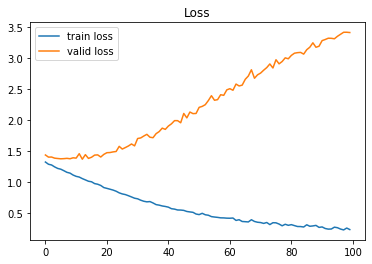

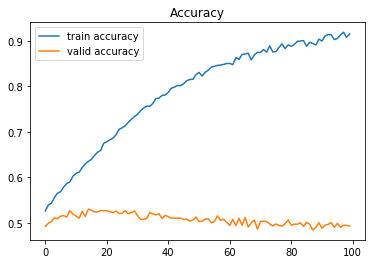

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()